In [513]:
import numpy as np
import pandas as pd
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import re
from cliffs_delta import cliffs_delta
from statistics import mean, stdev
from math import sqrt
import seaborn as sns
%matplotlib inline

Load Movie Ratings Data Set

In [514]:
data_df = pd.read_csv('movieReplicationSet.csv')
data_df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


# Q1: Are movies that are more popular (have more ratings) rated HIGHER than movies that are less popular?

0.2523838715821169 small
MannwhitneyuResult(statistic=1242808144.5, pvalue=0.0)
Median Arr 1: 3.0
Sample Size 1: 90214
Median Arr 2: 2.5
Sample Size 2: 22000


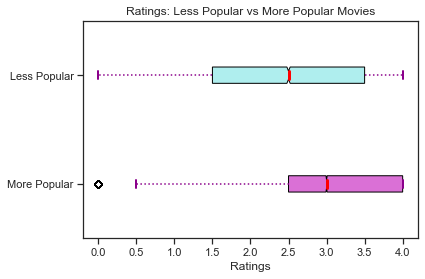

In [534]:
# Columns 1-400, find total number of ratings (count) for each movie

movies = data_df.iloc[:,0:400] # filter to ratings for 400 movies

movies_total_rating = movies.count(axis=0) # get the total count of ratings for each movie
mtr_reshape = movies_total_rating.values.reshape(1,400)
mtr_append = movies.append(pd.DataFrame(mtr_reshape, columns=movies.columns), ignore_index=True) # append count to df
sorted_movies = mtr_append.sort_values(mtr_append.last_valid_index(), axis=1) #sort df by rating counts

# movies_stats = movies_total_rating.describe() # get median rating for more popular movies vs median rating for movies that are less popular 197.5

less_popular = []
more_popular = []
for i, col in enumerate(sorted_movies.columns):     # select columns based on the values in the last row
    if sorted_movies.iloc[-1,i] < 197.5:
        less_popular.append(col)
    if sorted_movies.iloc[-1,i] > 197.5:
        more_popular.append(col)
        
less_popular = sorted_movies[less_popular] # create new df of just less popular movies
less_popular_drop = less_popular.iloc[:-1 , :]  # remove last row of median values
less_popular_arr = less_popular_drop.to_numpy().flatten() # flatten df values to one array
less_popular_arr = less_popular_arr[~np.isnan(less_popular_arr)] # get rid of nan values

more_popular = sorted_movies[more_popular] # create new df of just more popular movies
more_popular_drop = more_popular.iloc[:-1 , :]  # remove last row of median values
more_popular_arr = more_popular_drop.to_numpy().flatten() # flatten df values to one array
more_popular_arr = more_popular_arr[~np.isnan(more_popular_arr)] # get rid of nan values

# stats
d, res = cliffs_delta(more_popular_arr, less_popular_arr)
print(d,res)
print(scipy.stats.mannwhitneyu(more_popular_arr, less_popular_arr)) # significant
print("Median Arr 1: " +str(np.median(more_popular_arr)))
print("Sample Size 1: " +str(len(more_popular_arr)))
print("Median Arr 2: " +str(np.median(less_popular_arr)))
print("Sample Size 2: " +str(len(less_popular_arr)))

# plot

popular_combinedData = np.transpose(np.array([more_popular_arr,less_popular_arr],dtype=object))

fig = plt.figure()
ax = fig.add_subplot(111)
# Creating axes instance
bp = ax.boxplot(popular_combinedData, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['orchid', 'paleturquoise']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
    
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['More Popular', 'Less Popular'])
 
# Adding title
plt.title("Ratings: Less Popular vs More Popular Movies")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Ratings')
# show plot
plt.show()


# Q2: Are movies that are newer rated differently than movies that are older?

0.01668558320588261 negligible
MannwhitneyuResult(statistic=1553577699.0, pvalue=1.2849216001533932e-06)
Median Arr 1: 3.0
Sample Size 1: 65690
Sum of ranks 1: 186812.5
Median Arr 2: 3.0
Sample Size 2: 46524
Sum of ranks 2: 130839.5


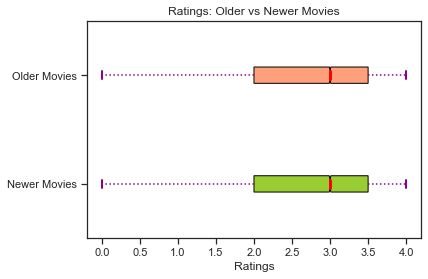

In [533]:
movie_years = data_df.iloc[:,0:400] # load movies
column_headers = list(movie_years.columns.values) # get movies names and create list
column_headers_str = ''.join(str(e) for e in column_headers) # put movie names into a string
years = re.findall(r'\(([^()]*)\)', column_headers_str) # find the years in the string
years_int = [int(i) for i in years]
movie_years.loc[len(movie_years)] = years_int # append the years string as row in df


movie_years_new = movie_years
median_year = movie_years_new.iloc[-1, :].median() # find median year: 1999
sorted_movie_years = movie_years.sort_values(movie_years.last_valid_index(), axis=1) # sort movies by year


old_movies = []
new_movies = []
for i, col in enumerate(sorted_movie_years.columns):     # select columns based on the values in the last row
    if sorted_movie_years.iloc[-1,i] < 1999:
        old_movies.append(col)
    if sorted_movie_years.iloc[-1,i] >= 1999:
        new_movies.append(col)
        
# 29 movies that are 1999, included in new movies to make sample sizes more comparable

old_movies = sorted_movie_years[old_movies] # create new df of just less popular movies
old_movies_drop = old_movies.iloc[:-1 , :]  # remove last row of median values
old_movies_arr = old_movies_drop.to_numpy().flatten() # flatten df values to one array
old_movies_arr = old_movies_arr[~np.isnan(old_movies_arr)] # get rid of nan values

new_movies = sorted_movie_years[new_movies] # create new df of just more popular movies
new_movies_drop = new_movies.iloc[:-1 , :]  # remove last row of median values
new_movies_arr = new_movies_drop.to_numpy().flatten() # flatten df values to one array
new_movies_arr = new_movies_arr[~np.isnan(new_movies_arr)] # get rid of nan values

# stats
d, res = cliffs_delta(new_movies_arr, old_movies_arr)
print(d,res)
print(scipy.stats.mannwhitneyu(new_movies_arr,old_movies_arr)) # significant
print("Median Arr 1: " +str(np.median(new_movies_arr)))
print("Sample Size 1: " +str(len(new_movies_arr)))
print("Sum of ranks 1: " +str(np.sum(new_movies_arr)))
print("Median Arr 2: " +str(np.median(old_movies_arr)))
print("Sample Size 2: " +str(len(old_movies_arr)))
print("Sum of ranks 2: "+str(np.sum(old_movies_arr)))


# plot

popular_combinedData = np.transpose(np.array([old_movies_arr,new_movies_arr],dtype=object))

fig = plt.figure()
ax = fig.add_subplot(111)
# Creating axes instance
bp = ax.boxplot(popular_combinedData, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['yellowgreen', 'lightsalmon']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
    
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Newer Movies', 'Older Movies'])
 
# Adding title
plt.title("Ratings: Older vs Newer Movies")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Ratings')
plt.show()

# Q3: Is enjoyment of ‘Shrek (2001)’ gendered, i.e. do male and female viewers rate it differently?

0.08152437968759599 negligible
MannwhitneyuResult(statistic=96830.5, pvalue=0.050536625925559006)
Median Arr 1: 3.5
Sample Size 1: 743
Sum 1: 2344.5
Median Arr 2: 3.0
Sample Size 2: 241
Sum 1: 743.0
KstestResult(statistic=0.09796552051512596, pvalue=0.056082040722863824)


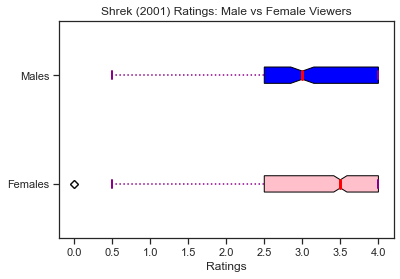

In [532]:
shrek_gender = data_df.loc[:,['Shrek (2001)','Gender identity (1 = female; 2 = male; 3 = self-described)']]
#print(shrek_gender)

df3 = shrek_gender.dropna() # drop rows that have null values
df3 = df3.reset_index(drop=True) # reset index


# separate by gender, two arrays

female = df3[df3['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1.0].reset_index(drop=True)
female = female['Shrek (2001)']

male = df3[df3['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2.0].reset_index(drop=True)
male = male['Shrek (2001)']

shrek_combinedData = np.transpose(np.array([female,male],dtype=object))

d, res = cliffs_delta(female, male)
print(d,res)
print(scipy.stats.mannwhitneyu(female,male)) # not significant
print("Median Arr 1: " +str(female.median()))
print("Sample Size 1: " +str(len(female)))
print("Sum 1: " +str(female.sum()))
print("Median Arr 2: " +str(male.median()))
print("Sample Size 2: " +str(len(male)))
print("Sum 1: " + str(male.sum()))
print(scipy.stats.kstest(female,male))

# colors = ['pink', 'blue']
# labels = ['Females', 'Males']
# lines = ['black', 'black']
# plt.boxplot(shrek_combinedData)
# plt.title('Shrek (2001) Ratings: Female vs Male Viewers')
# plt.legend(labels)
# plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
# Creating axes instance
bp = ax.boxplot(shrek_combinedData, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['pink', 'blue']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
    
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Females', 'Males'])
 
# Adding title
plt.title("Shrek (2001) Ratings: Male vs Female Viewers")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Ratings')
# show plot
plt.show()

# Q4: What proportion of movies are rated differently by male and female viewers?

50
0.125


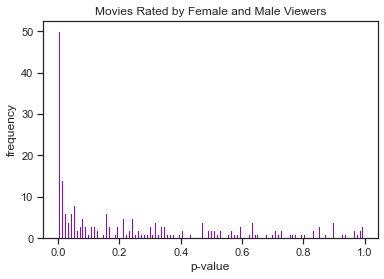

In [518]:
df4 = data_df.iloc[:,:475]
df4 = df4.drop(df4.iloc[:, 400:474],axis = 1)

# create two df for female and male viewers

female = df4[df4['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 1.0].reset_index(drop=True) # female df
female_t = np.transpose(female).iloc[:-1 , :] # transpose
female_arr = female_t.to_numpy() # convert to array
l1 = []
for a in female_arr: # iterate over rows in array
    a = a[np.isfinite(a)] # remove nan values element wise for each movie array
    l1.append(a)
female_arr_new = np.array(l1,dtype='object')

male = df4[df4['Gender identity (1 = female; 2 = male; 3 = self-described)'] == 2.0].reset_index(drop=True)
male_t = np.transpose(male).iloc[:-1 , :] # transpose
male_arr = male_t.to_numpy() # convert to array
l2 = []
for b in male_arr: # iterate over rows in array
    b = b[np.isfinite(b)] # remove nan values element wise for each movie array
    l2.append(b)
male_arr_new = np.array(l2,dtype='object')

# compare the corresponding movie arrays between female and male with mannwhitneyu
l3 = []
test_stats = []
eff_s = []
for i,j in zip(female_arr_new,male_arr_new):
    U_test = scipy.stats.mannwhitneyu(i,j)[1]
    test_val = scipy.stats.mannwhitneyu(i,j)[0]
    effect_size = abs(cliffs_delta(i,j)[0])
    l3.append(U_test)
    test_stats.append(test_val)
    eff_s.append(effect_size)
    

sig_count = 0
total = 0
for x in l3:
    if x <= 0.005:
        sig_count += 1
        total += 1
    else:
        sig_count += 0
        total += 1

p_male_fem = sig_count/total
print(sig_count)
print(p_male_fem)



plt.hist(l3,200,color='darkviolet')
plt.title('Movies Rated by Female and Male Viewers')
plt.xlabel('p-value')
plt.ylabel('frequency');



# Q5: Do people who are only children enjoy ‘The Lion King (1994)’ more than people with siblings?

-0.09658974534034273 negligible
MannwhitneyuResult(statistic=52929.0, pvalue=0.04319872995682849)
Median Arr 1: 3.5
Sample Size 1: 151
Sum 1: 505.5
Median Arr 2: 4.0
Sample Size 2: 776
Sum 2: 2702.0


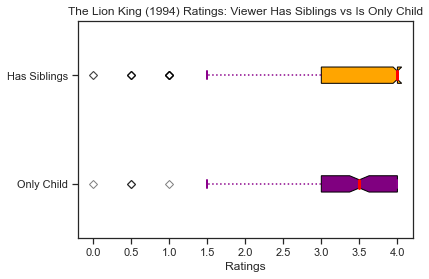

In [519]:
lion_child = data_df.loc[:,['The Lion King (1994)','Are you an only child? (1: Yes; 0: No; -1: Did not respond)']]

df5 = lion_child.dropna()
df5 = df5.reset_index(drop=True)

only = df5[df5['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1].reset_index(drop=True)
only = only['The Lion King (1994)']

sib = df5[df5['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0].reset_index(drop=True)
sib = sib['The Lion King (1994)']

lion_combinedData = np.transpose(np.array([only,sib],dtype=object))

# stats
d, res = cliffs_delta(only, sib)
print(d,res)
print(scipy.stats.mannwhitneyu(only,sib)) # not significant
print("Median Arr 1: " +str(only.median()))
print("Sample Size 1: " +str(len(only)))
print('Sum 1: ' +str(only.sum()))
print("Median Arr 2: " +str(sib.median()))
print("Sample Size 2: " +str(len(sib)))
print('Sum 2: ' +str(sib.sum()))



fig = plt.figure()
ax = fig.add_subplot(111)
# Creating axes instance
bp = ax.boxplot(lion_combinedData, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['purple', 'orange']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
    
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Only Child', 'Has Siblings'])
 
# Adding title
plt.title("The Lion King (1994) Ratings: Viewer Has Siblings vs Is Only Child")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Ratings')
# show plot
plt.show()

# Q6: What proportion of movies exhibit an “only child effect”, i.e. are rated different by viewers with siblings vs. those without?

7
0.0175


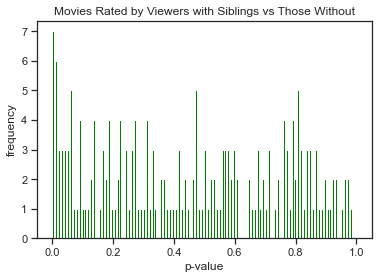

In [520]:
df6 = data_df.iloc[:,:476]
df6 = df6.drop(df6.iloc[:, 400:475],axis = 1)
df6

# create two df for female and male viewers

only = df6[df6['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 1].reset_index(drop=True) # female df
only_t = np.transpose(only).iloc[:-1 , :] # transpose
only_arr = only_t.to_numpy() # convert to array
l4 = []
for a in only_arr: # iterate over rows in array
    a = a[np.isfinite(a)] # remove nan values element wise for each movie array
    l4.append(a)
only_arr_new = np.array(l4,dtype='object')

sib = df6[df6['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'] == 0].reset_index(drop=True)
sib_t = np.transpose(sib).iloc[:-1 , :] # transpose
sib_arr = sib_t.to_numpy() # convert to array
l5 = []
for b in sib_arr: # iterate over rows in array
    b = b[np.isfinite(b)] # remove nan values element wise for each movie array
    l5.append(b)
sib_arr_new = np.array(l5,dtype='object')

# compare the corresponding movie arrays between female and male with mannwhitneyu
l6 = []
for i,j in zip(only_arr_new,sib_arr_new):
    U_test = scipy.stats.mannwhitneyu(i,j)[1]
    l6.append(U_test)

    

sig_count = 0
total = 0
for x in l6:
    if x <= 0.005:
        sig_count += 1
        total += 1
    else:
        sig_count += 0
        total += 1

p_only_sib = sig_count/total
print(sig_count)
print(p_only_sib)

plt.hist(l6,200,color='green')
plt.title('Movies Rated by Viewers with Siblings vs Those Without')
plt.xlabel('p-value')
plt.ylabel('frequency');
# plot effect size using forrest plot, do not plot p-vals bc they are testing different things


# run multiple mannuwhitneys for every movie between male and female
# append values to a chart corresponding to the movie
# find the total count of significant p-values and divide by total movies (400)
# the answer will be the fraction of movies rated differently btw male and female

# group by?

# Q7: Do people who like to watch movies socially enjoy ‘The Wolf of Wall Street (2013)’ more than those who prefer to watch them alone?

MannwhitneyuResult(statistic=49303.5, pvalue=0.1127642933222891)
-0.07070964093864857 negligible
Median Arr 1: 3.0
Sample Size 1: 270
Sum 1: 819.0
Median Arr 2: 3.5
Sample Size 2: 393
Sum 2: 1235.5


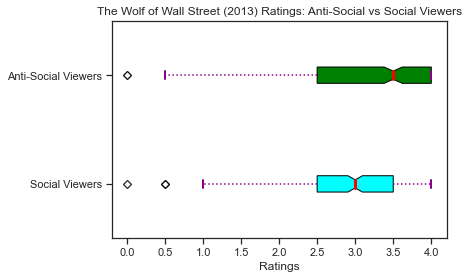

In [531]:
wolf_social = data_df.loc[:,['The Wolf of Wall Street (2013)','Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']]

df7 = wolf_social.dropna()
df7 = df7.reset_index(drop=True)

social = df7[df7['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0].reset_index(drop=True)
social = social['The Wolf of Wall Street (2013)']

anti = df7[df7['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1].reset_index(drop=True)
anti = anti['The Wolf of Wall Street (2013)']


# stats
print(scipy.stats.mannwhitneyu(social, anti)) # not significant
d, res = cliffs_delta(social, anti)
print(d,res)
print("Median Arr 1: " +str(social.median()))
print("Sample Size 1: " +str(len(social)))
print("Sum 1: " +str(social.sum()))
print("Median Arr 2: " +str(anti.median()))
print("Sample Size 2: " +str(len(anti)))
print("Sum 2: "+str(anti.sum()))

wolf_combinedData = np.transpose(np.array([social,anti],dtype=object))

fig = plt.figure()
ax = fig.add_subplot(111)
# Creating axes instance
bp = ax.boxplot(wolf_combinedData, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['cyan', 'green']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
    
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Social Viewers', 'Anti-Social Viewers'])
 
# Adding title
plt.title("The Wolf of Wall Street (2013) Ratings: Anti-Social vs Social Viewers")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Ratings')
# show plot
plt.show()

# Q8: What proportion of movies exhibit such a “social watching” effect?

10
0.025


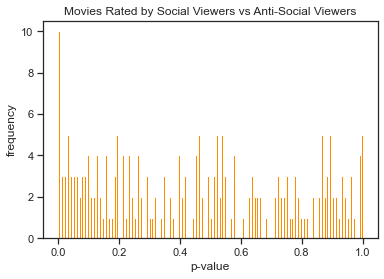

In [522]:
df8 = data_df.iloc[:,:477]
df8 = df8.drop(df8.iloc[:, 400:476],axis = 1)
#cannot drop row-wise
df8

# create two df for female and male viewers

social = df8[df8['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 0].reset_index(drop=True) # female df
social_t = np.transpose(social).iloc[:-1 , :] # transpose
social_arr = social_t.to_numpy() # convert to array
l7 = []
for a in social_arr: # iterate over rows in array
    a = a[np.isfinite(a)] # remove nan values element wise for each movie array
    l7.append(a)
social_arr_new = np.array(l7,dtype='object')

anti = df8[df8['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'] == 1].reset_index(drop=True)
anti_t = np.transpose(anti).iloc[:-1 , :] # transpose
anti_arr = anti_t.to_numpy() # convert to array
l8 = []
for b in anti_arr: # iterate over rows in array
    b = b[np.isfinite(b)] # remove nan values element wise for each movie array
    l8.append(b)
anti_arr_new = np.array(l8,dtype='object')

# compare the corresponding movie arrays between female and male with mannwhitneyu
l9 = []
for i,j in zip(social_arr_new,anti_arr_new):
    U_test = scipy.stats.mannwhitneyu(i,j)[1]
    l9.append(U_test)

    

sig_count = 0
total = 0
for x in l9:
    if x <= 0.005:
        sig_count += 1
        total += 1
    else:
        sig_count += 0
        total += 1

p_social_anti = sig_count/total
print(sig_count)
print(p_social_anti)

plt.hist(l9,200,color='darkorange')
plt.title('Movies Rated by Social Viewers vs Anti-Social Viewers')
plt.xlabel('p-value')
plt.ylabel('frequency');


# run multiple mannuwhitneys for every movie between male and female
# append values to a chart corresponding to the movie
# find the total count of significant p-values and divide by total movies (400)
# the answer will be the fraction of movies rated differently btw male and female

# pie-chart

# Q9: Is the ratings distribution of ‘Home Alone (1990)’ different than that of ‘Finding Nemo (2003)’?

KstestResult(statistic=0.15269080020897632, pvalue=6.379381467525036e-10)
Median Arr 1: 3.5
Sample Size 1: 857
Median Arr 2: 3.5
Sample Size 2: 1014


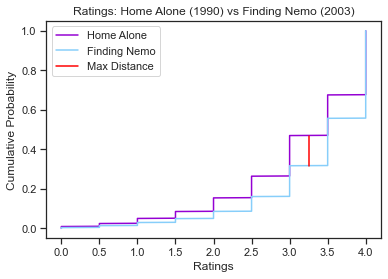

In [525]:
home_nemo = data_df.loc[:,['Home Alone (1990)','Finding Nemo (2003)']]

HN1 = pd.to_numeric(data_df['Home Alone (1990)'],errors='coerce').values
HN2 = pd.to_numeric(data_df['Finding Nemo (2003)'],errors='coerce').values

# element wise deletion
HN1 = HN1[np.isfinite(HN1)] # only keep the finite elements (not infinity or NaN)
# HN1 = np.reshape(HN1, (857,1))
HN2 = HN2[np.isfinite(HN2)]
# HN2 = np.reshape(HN2, (1014,1))

print(scipy.stats.kstest(HN1, HN2)) # significant
# d, res = cliffs_delta(HN1, HN2)
# print(d,res)

# n1,n2 = sample sizes of groups 1 and 2
# s1,s2  = variances of groups 1 and 2
# u1,u2 = means of groups 1 and 2

print("Median Arr 1: " +str(np.median(HN1)))
print("Sample Size 1: " +str(len(HN1)))
print("Median Arr 2: " +str(np.median(HN2)))
print("Sample Size 2: " +str(len(HN2)))

HN_combinedData = np.transpose(np.array([HN1,HN2],dtype=object))

# plt.hist(HN2,bins=9,alpha=0.6, color='violet', edgecolor='black', label='Finding Nemo')
# plt.hist(HN1,bins=9,alpha=0.4, color='lightskyblue', edgecolor='black', label='Home Alone')
# plt.title('Ratings: Home Alone (1990) vs Finding Nemo (2003)')
# plt.xlabel('Ratings')
# plt.ylabel('Frequency')
# plt.legend()
# plt.show()

# No of data points used
N = 857
N2 = 1014
  
# normal distribution
data = HN1
data2 = HN2
  
# sort the data in ascending order
x = np.sort(data)
x2 = np.sort(data2)
  
# get the cdf values of y
y = np.arange(N) / float(N)
y2 = np.arange(N2) / float(N2)
  
# plotting
plt.xlabel('Ratings')
plt.ylabel('Cumulative Probability')
  
plt.title('Ratings: Home Alone (1990) vs Finding Nemo (2003)')
  
plt.plot(x, y, color='darkviolet', label='Home Alone')
plt.plot(x2, y2, color='lightskyblue', label='Finding Nemo')
plt.axvline(x = 3.25, ymin = 0.33, ymax = 0.47, color='red', label='Max Distance')
plt.legend()
plt.show()

# Q10: There are ratings on movies from several franchises ([‘Star Wars’, ‘Harry Potter’, ‘The Matrix’, ‘Indiana Jones’, ‘Jurassic Park’, ‘Pirates of the Caribbean’, ‘Toy Story’, ‘Batman’]) in this dataset. How many of these are of inconsistent quality, as experienced by viewers? [Hint: You can use the keywords in quotation marks featured in this question to identify the movies that are part of each franchise]

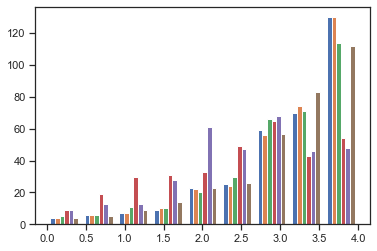

Star Wars: KruskalResult(statistic=193.51026675400544, pvalue=6.940162236984522e-40)


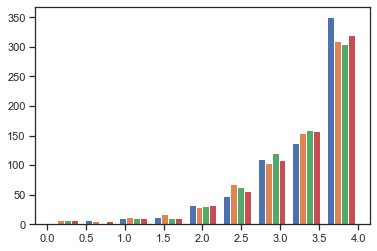

Harry Potter: KruskalResult(statistic=5.8739552218536755, pvalue=0.11790622831256074)


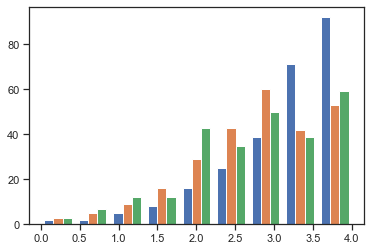

Matrix: KruskalResult(statistic=40.32303905969196, pvalue=1.7537323830838066e-09)


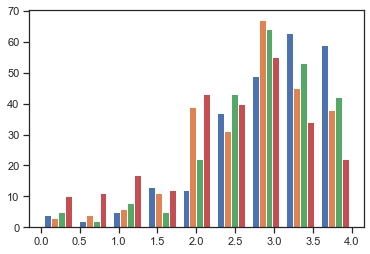

Indiana: KruskalResult(statistic=54.19395477406098, pvalue=1.020118354785894e-11)


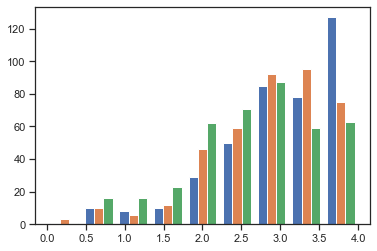

Jurassic: KruskalResult(statistic=49.42733030275783, pvalue=1.8492328391686058e-11)


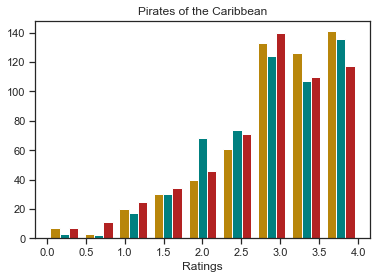

Pirates: KruskalResult(statistic=6.66002108648457, pvalue=0.03579272769426581)


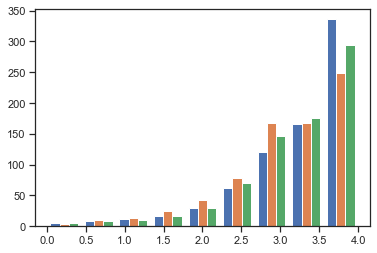

Toy Story: KruskalResult(statistic=23.496729938969775, pvalue=7.902234665149812e-06)


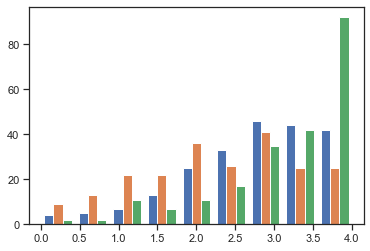

Batman: KruskalResult(statistic=84.65778425637279, pvalue=4.1380499020034183e-19)


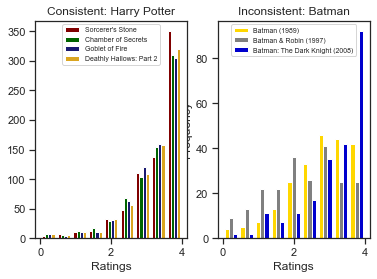

In [524]:
# inconsistent quality, ratings vary as the series continues
# row wise deletion because we only care about the viewers who watched all movies
# Kruskal Wallis
# report the size of the viewers that watched all the movies in a franchise! get the shape of the combinedData
# address concerns about independence assumption for this test, since we are looking at ratings from the same people
# would use an ANOVA but this is rank data, lose some power

# Star Wars
S1 = pd.to_numeric(data_df['Star Wars: Episode IV - A New Hope (1977)'],errors='coerce').values
S2 = pd.to_numeric(data_df['Star Wars: Episode V - The Empire Strikes Back (1980)'],errors='coerce').values
S3 = pd.to_numeric(data_df['Star Wars: Episode VI - The Return of the Jedi (1983)'],errors='coerce').values
S4 = pd.to_numeric(data_df['Star Wars: Episode 1 - The Phantom Menace (1999)'],errors='coerce').values
S5 = pd.to_numeric(data_df['Star Wars: Episode II - Attack of the Clones (2002)'],errors='coerce').values
S6 = pd.to_numeric(data_df['Star Wars: Episode VII - The Force Awakens (2015)'],errors='coerce').values

S_temp = np.array([pd.isnull(S1),pd.isnull(S2),pd.isnull(S3),pd.isnull(S4),pd.isnull(S5),pd.isnull(S6)],dtype=bool)
S_temp2 = S_temp*1
S_temp2 = sum(S_temp2)
S_missingData = np.where(S_temp2>0)
S1 = np.delete(S1,S_missingData)
S2 = np.delete(S2,S_missingData)
S3 = np.delete(S3,S_missingData)
S4 = np.delete(S4,S_missingData)
S5 = np.delete(S5,S_missingData)
S6 = np.delete(S6,S_missingData)

S_combinedData = np.transpose(np.array([S1,S2,S3,S4,S5,S6]))
plt.hist(S_combinedData, bins=9)
plt.show()

print('Star Wars: ' + str(scipy.stats.kruskal(S1,S2,S3,S4,S5,S6))) # significant

# Harry Potter
H1 = pd.to_numeric(data_df['Harry Potter and the Sorcerer\'s Stone (2001)'],errors='coerce').values
H2 = pd.to_numeric(data_df['Harry Potter and the Chamber of Secrets (2002)'],errors='coerce').values
H3 = pd.to_numeric(data_df['Harry Potter and the Goblet of Fire (2005)'],errors='coerce').values
H4 = pd.to_numeric(data_df['Harry Potter and the Deathly Hallows: Part 2 (2011)'],errors='coerce').values

H_temp = np.array([pd.isnull(H1),pd.isnull(H2),pd.isnull(H3),pd.isnull(H4)],dtype=bool)
H_temp2 = H_temp*1
H_temp2 = sum(H_temp2)
H_missingData = np.where(H_temp2>0)
H1 = np.delete(H1,H_missingData)
H2 = np.delete(H2,H_missingData) 
H3 = np.delete(H3,H_missingData) 
H4 = np.delete(H4,H_missingData)

H_combinedData = np.transpose(np.array([H1,H2,H3,H4]))
plt.hist(H_combinedData, bins=9)
plt.show()

print('Harry Potter: ' + str(scipy.stats.kruskal(H1,H2,H3,H4))) # not significant

# The Matrix
M1 = pd.to_numeric(data_df['The Matrix (1999)'],errors='coerce').values
M2 = pd.to_numeric(data_df['The Matrix Reloaded (2003)'],errors='coerce').values
M3 = pd.to_numeric(data_df['The Matrix Revolutions (2003)'],errors='coerce').values

M_temp = np.array([pd.isnull(M1),pd.isnull(M2),pd.isnull(M3)],dtype=bool)
M_temp2 = M_temp*1
M_temp2 = sum(M_temp2)
M_missingData = np.where(M_temp2>0)
M1 = np.delete(M1,M_missingData)
M2 = np.delete(M2,M_missingData) 
M3 = np.delete(M3,M_missingData)


M_combinedData = np.transpose(np.array([M1,M2,M3]))
plt.hist(M_combinedData, bins=9)
plt.show()

print('Matrix: ' + str(scipy.stats.kruskal(M1,M2,M3))) # significant

# Indiana Jones
I1 = pd.to_numeric(data_df['Indiana Jones and the Raiders of the Lost Ark (1981)'],errors='coerce').values
I2 = pd.to_numeric(data_df['Indiana Jones and the Temple of Doom (1984)'],errors='coerce').values
I3 = pd.to_numeric(data_df['Indiana Jones and the Last Crusade (1989)'],errors='coerce').values
I4 = pd.to_numeric(data_df['Indiana Jones and the Kingdom of the Crystal Skull (2008)'],errors='coerce').values

I_temp = np.array([pd.isnull(I1),pd.isnull(I2),pd.isnull(I3),pd.isnull(I4)],dtype=bool)
I_temp2 = I_temp*1
I_temp2 = sum(I_temp2)
I_missingData = np.where(I_temp2>0)
I1 = np.delete(I1,I_missingData)
I2 = np.delete(I2,I_missingData) 
I3 = np.delete(I3,I_missingData) 
I4 = np.delete(I4,I_missingData)

I_combinedData = np.transpose(np.array([I1,I2,I3,I4]))
plt.hist(I_combinedData, bins=9)
plt.show()
      
print('Indiana: ' + str(scipy.stats.kruskal(I1,I2,I3,I4))) # significant

# Jurassic Park
J1 = pd.to_numeric(data_df['Jurassic Park (1993)'],errors='coerce').values
J2 = pd.to_numeric(data_df['The Lost World: Jurassic Park (1997)'],errors='coerce').values
J3 = pd.to_numeric(data_df['Jurassic Park III (2001)'],errors='coerce').values

J_temp = np.array([pd.isnull(J1),pd.isnull(J2),pd.isnull(J3)],dtype=bool)
J_temp2 = J_temp*1
J_temp2 = sum(J_temp2)
J_missingData = np.where(J_temp2>0)
J1 = np.delete(J1,J_missingData)
J2 = np.delete(J2,J_missingData) 
J3 = np.delete(J3,J_missingData) 

J_combinedData = np.transpose(np.array([J1,J2,J3]))
plt.hist(J_combinedData, bins=9)
plt.show()

print('Jurassic: ' + str(scipy.stats.kruskal(J1,J2,J3))) # significant

# Pirates of the Caribbean
P1 = pd.to_numeric(data_df['Pirates of the Caribbean: The Curse of the Black Pearl (2003)'],errors='coerce').values
P2 = pd.to_numeric(data_df['Pirates of the Caribbean: Dead Man\'s Chest (2006)'],errors='coerce').values
P3 = pd.to_numeric(data_df['Pirates of the Caribbean: At World\'s End (2007)'],errors='coerce').values

P_temp = np.array([pd.isnull(P1),pd.isnull(P2),pd.isnull(P3)],dtype=bool)
P_temp2 = P_temp*1
P_temp2 = sum(P_temp2)
P_missingData = np.where(P_temp2>0)
P1 = np.delete(P1,P_missingData)
P2 = np.delete(P2,P_missingData) 
P3 = np.delete(P3,P_missingData)

colors = ['darkgoldenrod', 'teal', 'firebrick']
P_combinedData = np.transpose(np.array([P1,P2,P3]))
plt.hist(P_combinedData, bins=9, color=colors)
plt.title('Pirates of the Caribbean')
plt.xlabel('Ratings')
plt.ylabel('')
plt.show()
      
print('Pirates: ' + str(scipy.stats.kruskal(P1,P2,P3))) # not significant

# Toy Story
T1 = pd.to_numeric(data_df['Toy Story (1995)'],errors='coerce').values
T2 = pd.to_numeric(data_df['Toy Story 2 (1999)'],errors='coerce').values
T3 = pd.to_numeric(data_df['Toy Story 3 (2010)'],errors='coerce').values

T_temp = np.array([pd.isnull(T1),pd.isnull(T2),pd.isnull(T3)],dtype=bool)
T_temp2 = T_temp*1
T_temp2 = sum(T_temp2)
T_missingData = np.where(T_temp2>0)
T1 = np.delete(T1,T_missingData)
T2 = np.delete(T2,T_missingData) 
T3 = np.delete(T3,T_missingData) 

T_combinedData = np.transpose(np.array([T1,T2,T3]))
plt.hist(T_combinedData, bins=9)
plt.show()

print('Toy Story: ' + str(scipy.stats.kruskal(T1,T2,T3))) # significant
      
# Batman
B1 = pd.to_numeric(data_df['Batman (1989)'],errors='coerce').values
B2 = pd.to_numeric(data_df['Batman & Robin (1997)'],errors='coerce').values
B3 = pd.to_numeric(data_df['Batman: The Dark Knight (2008)'],errors='coerce').values

B_temp = np.array([pd.isnull(B1),pd.isnull(B2),pd.isnull(B3)],dtype=bool)
B_temp2 = B_temp*1
B_temp2 = sum(B_temp2)
B_missingData = np.where(B_temp2>0)
B1 = np.delete(B1,B_missingData)
B2 = np.delete(B2,B_missingData) 
B3 = np.delete(B3,B_missingData) 

B_combinedData = np.transpose(np.array([B1,B2,B3]))
plt.hist(B_combinedData, bins=9)
plt.show()

print('Batman: ' + str(scipy.stats.kruskal(B1,B2,B3))) # significant

colors = ['gold', 'gray', 'mediumblue']
labels = ['Batman (1989)','Batman & Robin (1997)','Batman: The Dark Knight (2008)']
colors2 = ['maroon','darkgreen','midnightblue','goldenrod']
labels2 = ['Sorcerer\'s Stone','Chamber of Secrets','Goblet of Fire','Deathly Hallows: Part 2']
plt.subplot(1,2,2)
plt.hist(B_combinedData, bins=9, color=colors, label=labels)
plt.title('Inconsistent: Batman')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.legend(loc=9, fontsize='x-small')
plt.subplot(1,2,1)
plt.hist(H_combinedData, bins=9, color=colors2, label=labels2)
plt.title('Consistent: Harry Potter')
plt.xlabel('Ratings')
plt.legend(loc=9, fontsize='x-small')
plt.show()

# Extra Credit Findings

In [493]:
#locate column index
data_df.columns.get_loc("I had a sheltered upbringing")

414

In [494]:
# finding anything of significance

dfx = data_df.iloc[:,:415]
dfx = dfx.drop(dfx.iloc[:, 400:414],axis = 1)

no = dfx[dfx['I had a sheltered upbringing'] == 1 | 2].reset_index(drop=True)
no_t = np.transpose(no).iloc[:-1 , :] # transpose
no_arr = no_t.to_numpy() # convert to array
l1 = []
for a in no_arr: # iterate over rows in array
    a = a[np.isfinite(a)] # remove nan values element wise for each movie array
    l1.append(a)
no_arr_new = np.array(l1,dtype='object')

yes = dfx[dfx['I had a sheltered upbringing'] == 4 | 5].reset_index(drop=True)
yes_t = np.transpose(yes).iloc[:-1 , :] # transpose
yes_arr = yes_t.to_numpy() # convert to array
l2 = []
for b in yes_arr: # iterate over rows in array
    b = b[np.isfinite(b)] # remove nan values element wise for each movie array
    l2.append(b)
yes_arr_new = np.array(l2,dtype='object')


# compare the corresponding movie arrays with mannwhitneyu
l3 = []
test_stats = []
eff_s = []
names = column_headers
for i,j in zip(yes_arr_new,no_arr_new):
    U_test = scipy.stats.mannwhitneyu(i,j)[1]
    test_val = scipy.stats.mannwhitneyu(i,j)[0]
    effect_size = abs(cliffs_delta(i,j)[0])
    l3.append(U_test)
    test_stats.append(test_val)
    eff_s.append(effect_size)

sig_count = 0
total = 0
for x,y in zip(l3,names):
    if x <= 0.005:
        print(y)
        sig_count += 1
        total += 1
    else:
        sig_count += 0
        total += 1

p = sig_count/total
print(sig_count)
print(p)


Night of the Living Dead (1968)
The Jungle Book (1967)
Star Wars: Episode II - Attack of the Clones (2002)
Andaz Apna Apna (1994)
The Truman Show (1998)
The Prestige (2006)
Harry Potter and the Sorcerer's Stone (2001)
Cable Guy (1996)
Bowling For Columbine (2002)
The Hulk (2003)
American Psycho (2000)
Kill Bill: Vol. 1 (2003)
Austin Powers in Goldmember (2002)
Bad Boys 2 (2003)
The Descent (2005)
Twister (1996)
16
0.04


I had a sheltered upbringing = Bowling For Columbine (2002), Kill Bill: Vol. 1 (2003), American Psycho (2000)

MannwhitneyuResult(statistic=1197.0, pvalue=0.0014329116997601609)
0.33203125 medium
Median Arr 1: 3.5
Sample Size 1: 64
Sum 1: 207.5
Median Arr 2: 3.0
Sample Size 2: 56
Sum 2: 146.5
MannwhitneyuResult(statistic=1452.0, pvalue=0.0007008997606650681)
0.3327205882352941 medium
Median Arr 1: 3.5
Sample Size 1: 64
Sum 1: 220.5
Median Arr 2: 3.0
Sample Size 2: 68
Sum 2: 197.5
MannwhitneyuResult(statistic=190.5, pvalue=0.00089799217761637)
0.5134099616858238 large
Median Arr 1: 3.0
Sample Size 1: 27
Sum 1: 80.5
Median Arr 2: 2.0
Sample Size 2: 29
Sum 2: 58.5


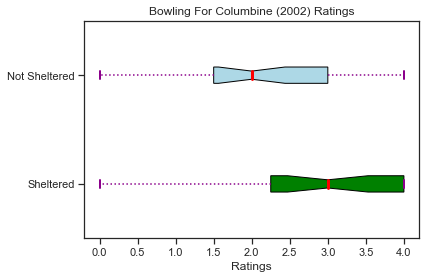

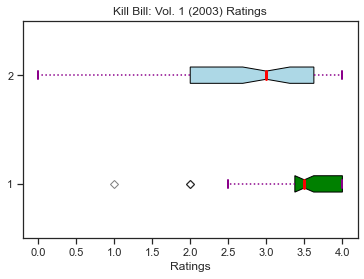

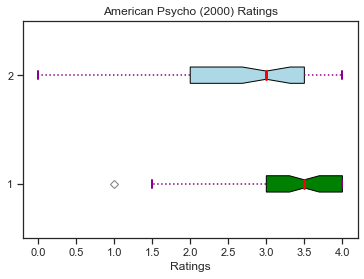

In [512]:
comp1 = data_df.loc[:,['I had a sheltered upbringing','American Psycho (2000)']]
comp2 = data_df.loc[:,['I had a sheltered upbringing','Kill Bill: Vol. 1 (2003)']]
comp3 = data_df.loc[:,['I had a sheltered upbringing','Bowling For Columbine (2002)']]

dfa = comp1.dropna()
dfa = dfa.reset_index(drop=True)
dfk = comp2.dropna()
dfk = dfk.reset_index(drop=True)
dfbc = comp3.dropna()
dfbc = dfbc.reset_index(drop=True)

# American Psycho
A_no = dfa[dfa['I had a sheltered upbringing'] == 1 | 2].reset_index(drop=True)
A_no = A_no['American Psycho (2000)']
A_yes = dfa[dfa['I had a sheltered upbringing'] == 4 | 5].reset_index(drop=True)
A_yes = A_yes['American Psycho (2000)']

# stats
print(scipy.stats.mannwhitneyu(A_no, A_yes)) # not significant
d, res = cliffs_delta(A_yes, A_no)
print(d,res)
print("Median Arr 1: " +str(np.median(A_yes)))
print("Sample Size 1: " +str(len(A_yes)))
print("Sum 1: " +str(np.sum(A_yes)))
print("Median Arr 2: " +str(np.median(A_no)))
print("Sample Size 2: " +str(len(A_no)))
print("Sum 2: "+str(np.sum(A_no)))

A_combinedData = np.transpose(np.array([A_yes,A_no],dtype=object))

# Kill Bill
K_no = dfk[dfk['I had a sheltered upbringing'] == 1 | 2].reset_index(drop=True)
K_no = K_no['Kill Bill: Vol. 1 (2003)']
K_yes = dfk[dfk['I had a sheltered upbringing'] == 4 | 5].reset_index(drop=True)
K_yes = K_yes['Kill Bill: Vol. 1 (2003)']

# stats
print(scipy.stats.mannwhitneyu(K_no, K_yes)) # not significant
d, res = cliffs_delta(K_yes, K_no)
print(d,res)
print("Median Arr 1: " +str(np.median(K_yes)))
print("Sample Size 1: " +str(len(K_yes)))
print("Sum 1: " +str(np.sum(K_yes)))
print("Median Arr 2: " +str(np.median(K_no)))
print("Sample Size 2: " +str(len(K_no)))
print("Sum 2: "+str(np.sum(K_no)))

K_combinedData = np.transpose(np.array([K_yes,K_no],dtype=object))

# Bowling for Columbine
BC_no = dfbc[dfbc['I had a sheltered upbringing'] == 1 | 2].reset_index(drop=True)
BC_no = BC_no['Bowling For Columbine (2002)']
BC_yes = dfbc[dfbc['I had a sheltered upbringing'] == 4 | 5].reset_index(drop=True)
BC_yes = BC_yes['Bowling For Columbine (2002)']

# stats
print(scipy.stats.mannwhitneyu(BC_no, BC_yes)) # not significant
d, res = cliffs_delta(BC_yes, BC_no)
print(d,res)
print("Median Arr 1: " +str(np.median(BC_yes)))
print("Sample Size 1: " +str(len(BC_yes)))
print("Sum 1: " +str(np.sum(BC_yes)))
print("Median Arr 2: " +str(np.median(BC_no)))
print("Sample Size 2: " +str(len(BC_no)))
print("Sum 2: "+str(np.sum(BC_no)))

BC_combinedData = np.transpose(np.array([BC_yes,BC_no],dtype=object))


fig1 = plt.figure()
ax = fig1.add_subplot(111)
# Creating axes instance
bp = ax.boxplot(BC_combinedData, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['green', 'lightblue']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
    
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
ax.set_yticklabels(['Sheltered', 'Not Sheltered'])
 
# Adding title
plt.title("Bowling For Columbine (2002) Ratings")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Ratings')
# show plot
plt.show()


fig2 = plt.figure()
ax = fig2.add_subplot(111)
# Creating axes instance
bp = ax.boxplot(K_combinedData, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['green', 'lightblue']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
    
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
# ax.set_yticklabels(['Sheltered', 'Not Sheltered'])
 
# Adding title
plt.title("Kill Bill: Vol. 1 (2003) Ratings")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Ratings')
# show plot
plt.show()

fig3 = plt.figure()
ax = fig3.add_subplot(111)
# Creating axes instance
bp = ax.boxplot(A_combinedData, patch_artist = True,
                notch ='True', vert = 0)
 
colors = ['green', 'lightblue']
 
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
 
# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)
    
# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)
 
# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
     
# x-axis labels
# ax.set_yticklabels(['Sheltered', 'Not Sheltered'])
 
# Adding title
plt.title("American Psycho (2000) Ratings")
 
# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
plt.xlabel('Ratings')
# show plot
plt.show()